In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

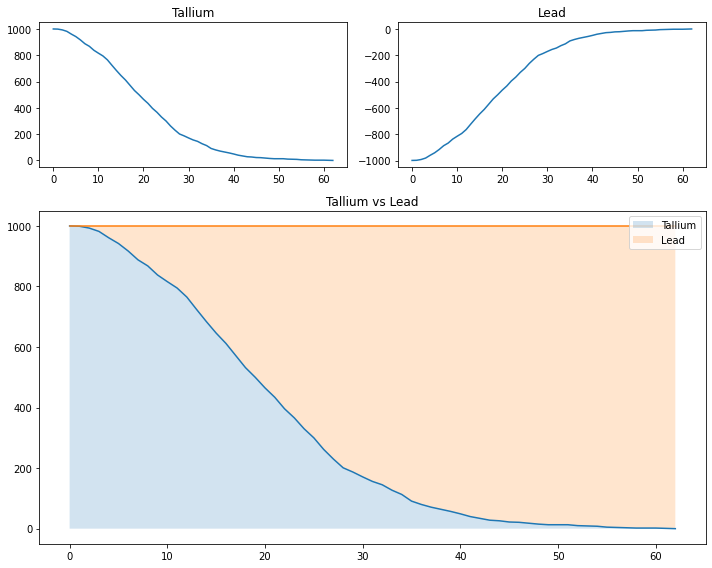

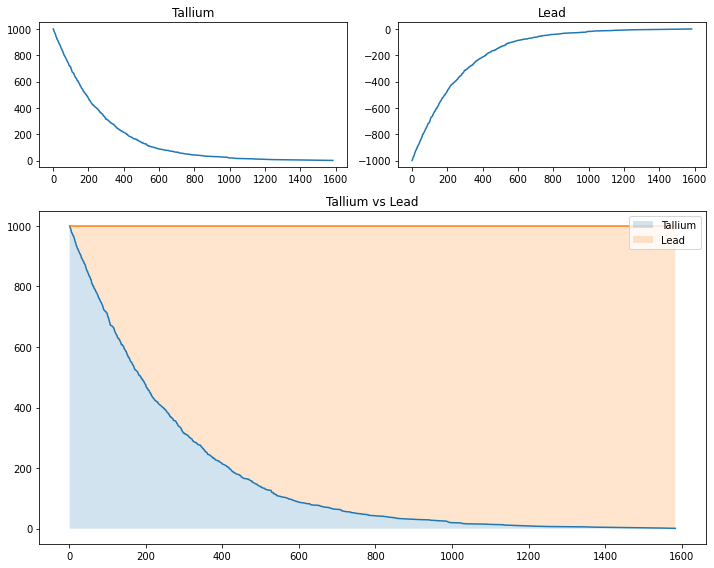

In [2]:
number_thallium = 1000
tallium_over_time = [number_thallium, ]
tau = 3.052 * 60
t = 0
while number_thallium != 0:
    t = t + 1
    for i in range(number_thallium):
        if (np.random.random() < (1-2**(-t/tau))):
            number_thallium = number_thallium - 1
    tallium_over_time += [number_thallium, ]

def display_graph(time, tallium_over_time):
    gridsize = (3, 2)
    fig = plt.figure(figsize=(10, 8))
    ax = plt.subplot2grid(gridsize, (0, 0), colspan=1, rowspan=1)
    ax.plot(time, tallium_over_time)
    ax.set_title('Tallium')
    ax = plt.subplot2grid(gridsize, (0, 1), colspan=1, rowspan=1)
    ax.plot(time, 1-np.array(tallium_over_time))
    ax.set_title('Lead')
    ax = plt.subplot2grid(gridsize, (1, 0), colspan=2, rowspan=2)
    ax.plot(time, tallium_over_time)
    tal = ax.fill_between(time, np.zeros(len(tallium_over_time)), tallium_over_time, alpha=0.2)
    ax.plot(time, 1000*np.ones(len(tallium_over_time)))
    lead = ax.fill_between(time, tallium_over_time, 1000*np.ones(len(tallium_over_time)), alpha=0.2)
    ax.set_title('Tallium vs Lead')
    tal.set_label('Tallium')
    lead.set_label('Lead')
    ax.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

display_graph(np.arange(len(tallium_over_time)), tallium_over_time)

time = np.random.random(1000)
time = -tau * np.log2(1-time)
time = np.sort(time)
display_graph(time, np.arange(1000,0, -1))

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

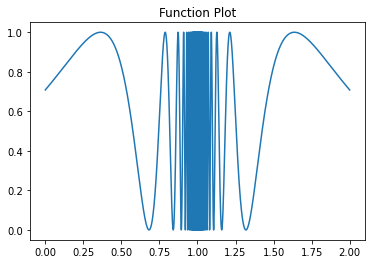

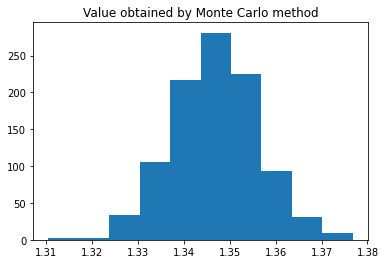

Value obtained by Monte Carlo method
Integral = 1.3470562
Error = 0.007001986097340606

Value obtained by Mean Value method
Integral = 1.3424308600396253
Error = 0.006547000581703021


In [3]:
def function(x):
    return np.power(np.sin(1/(1-x)), 2)
x = np.linspace(0, 2, 100000)
fig, ax = plt.subplots(1)
ax.plot(x, function(x))
ax.set_title('Function Plot')
plt.show()

# Monte Carlo integration
def Monte_Carlo_integ(f):
    N = 10000
    count = 0
    for i in range(N):
        x = 2 * np.random.random() # x is random uniform between 0 and 2
        y = np.random.random()     # y is random uniform between 0 and 1
        if y < f(x): count += 1
    I = 2 * count / N
    return I

integral = []
for i in range(1000):
    integral += [Monte_Carlo_integ(function), ]
fig, ax = plt.subplots(1)
h = ax.hist(integral)
ax.set_title('Value obtained by Monte Carlo method')
plt.show()
print('Value obtained by Monte Carlo method')
print('Integral =', np.mean(integral))
print('Error =',np.std(integral)/np.mean(integral))

def mean_value_method(a, b, N, f):
    x = np.random.random(N)
    x = (b-a)*x + a
    y = f(x)
    return ((b-a)*np.sum(y))/N, (b-a)*((np.var(y))**0.5)/(N**0.5)

(I, err) = mean_value_method(0,2,10000, function)

print('\nValue obtained by Mean Value method')
print('Integral =', I)
print('Error =', err)

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [5]:
import gc

def circle(coordinates):
    radius = 1
    return np.heaviside(- np.power(coordinates, 2).sum(axis=0) + radius, 1)

def Monte_Carlo_circle(dimension):
    N = 10000000
    n = 10
    sum = 0
    for i in range(n):
        x = (np.random.random((dimension, N)) * 2) -1
        y = circle(x)
        sum += np.sum(y)
        # I did not have enought RAM
        del x
        del y
        gc.collect()
    return 2**dimension*sum/(N*n)
    
print('For 2 dimensions Monte Carlo solution is',Monte_Carlo_circle(2))
print('The analytical solution is', np.pi)
print('\nFor 10 dimensions Monte Carlo solution is', Monte_Carlo_circle(10))
print('The analytical solution is', np.pi**5/(5*4*3*2))

For 2 dimension Monte Carlo solution is 3.14137888
The analytical solution is 3.141592653589793

For 10 dimension Monte Carlo solution is 2.55442944
The analytical solution is 2.550164039877345


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

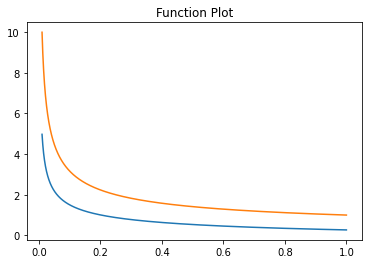

IS integral: 0.761468778388344


In [42]:
def fun(x):
    return (x**(-0.5))/(np.e**x +1)

def weight(x):
    return x**(-0.5)

x = np.linspace(0.01, 1, 100000)
fig, ax = plt.subplots(1)
ax.plot(x, fun(x))
ax.plot(x, weight(x))
ax.set_title('Function Plot')
plt.show()

n = 10000
x = np.random.rand(n)
h_is = 2 * (1 / n) * np.sum(fun(x) / weight(x))
print("IS integral:", h_is)
